# Recolección de datos

Esta parte la puede detallar mejor Jessica

# Preprocesamiento y extracción de características

Una vez que definimos las columnas, o variables, que utilizaremos en la construcción del dataset recurrimos a reglas del negocio para saber como tratar los valores *en blanco* o nulos

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
datos = pd.read_csv('DataClientes.csv')

In [2]:
datos['DESC_CE_FINANCIERO'].replace( {'':'Desconocido' }, inplace = True) # en migraciones de la BD se pierden algunas direcciones
# para poder imputar los valores que no se tienen de la variable 'SALDO_CONTRATO', los ceros, 
# nos fijamos en su distribucion 
# datos[['SALDO_CONTRATO']].hist()
datos[['SALDO_CONTRATO']].describe()

,SALDO_CONTRATO
count,3.358000e+03
mean,2.307899e+06
std,3.096281e+07
min,0.000000e+00
25%,7.003748e+04
50%,2.331926e+05
75%,6.879034e+05
max,1.214598e+09


In [3]:
# imputamos la variable datos[['SALDO_CONTRATO']] por la mediana pues hay valores muy grandes y usar la media sesga más
datos['SALDO_CONTRATO'].replace({ 0: np.median(datos.SALDO_CONTRATO)}, inplace=True)

# para poder imputar los valores que no se tienen de la variable 'SALDO_CLIENTE', los ceros, 
# nos fijamos en su distribucion 
# datos[['SALDO_CLIENTE']].hist()
datos[['SALDO_CLIENTE']].describe()
# imputamos la variable datos[['SALDO_CLIENTE']] por la mediana pues hay valores muy grandes y usar la media sesga más
datos['SALDO_CLIENTE'].replace({ 0: np.median(datos.SALDO_CLIENTE)}, inplace=True)

In [4]:
# para imputar el tipo de cliente, variable 'DESC_TIPO_PERS' lo hacemos por reglas del degocio. La mayoria de clientes son personas fisicas
datos.DESC_TIPO_PERS.value_counts
datos[['DESC_TIPO_PERS']] = datos[['DESC_TIPO_PERS']].fillna(value='PERSONA FISICA')
# para imputar la variable a predecir el tipo de cliente, variable 'STATUS_BE'
# lo hacemos por reglas del degocio, si el cliente tiene dado de alta la banca electronica lo marcamos como 1 y 0 en otro caso 
datos[['STATUS_BE']] = datos[['STATUS_BE']].fillna(value='NO_ENROLADO')
datos['STATUS_BE'].replace({ 'NO_ENROLADO': 0, 'ENROLADO':1}, inplace=True)
datos['STATUS_BE'].astype('int64')

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      0
25      1
26      1
27      1
28      1
29      1
       ..
3328    1
3329    1
3330    1
3331    1
3332    1
3333    1
3334    1
3335    1
3336    1
3337    1
3338    1
3339    1
3340    1
3341    1
3342    1
3343    1
3344    1
3345    1
3346    1
3347    1
3348    1
3349    1
3350    1
3351    1
3352    1
3353    1
3354    1
3355    1
3356    1
3357    1
Name: STATUS_BE, Length: 3358, dtype: int64

In [5]:
# finalmente como la mayoria de las columnas son nominales las transformamos a dummies y realizamos un escalamiento
del datos['CLAVE_CLIENTE']
datos['UNIDAD_NEGOCIO'] = datos['UNIDAD_NEGOCIO'].astype('category')
datos['EMISORA_FONDO'] = datos['EMISORA_FONDO'].astype('category')
datos['CATEGORIA_OP'] = datos['CATEGORIA_OP'].astype('category')
datos['DESC_CE_FINANCIERO'] = datos['DESC_CE_FINANCIERO'].astype('category')
datos['DESC_TIPO_PERS'] = datos['DESC_TIPO_PERS'].astype('category')

# Selección de características

De las variables numéricas que disponemos, que corresponden con saldos en cuenta de los clientes en dos diferentes momentos, estas estan altamente correlacionadas (como lo muestra la siguiente grafica), por lo que descartaremos la segunda como *feature* para el modelo de clasificación que construiremos.

[[1.         0.90527514]
 [0.90527514 1.        ]]


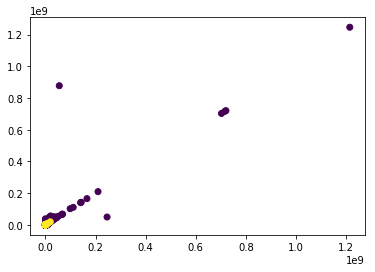

In [6]:
import matplotlib.pyplot as plt
plt.scatter(datos['SALDO_CONTRATO'], datos['SALDO_CLIENTE'], c = datos['STATUS_BE'])
print(np.corrcoef(datos['SALDO_CONTRATO'], datos['SALDO_CLIENTE']))

In [7]:
del datos['SALDO_CLIENTE']

En vista de que la mayoría de las columnas con las que trabajaremos son nominales vamos a realizar un cambio de encoding. Como tenemos algunas variables con más de 50 categorías en lugar de hacer dummies estas variables usaremos un encoding que mapea a cada categoría con un entero. 

In [8]:
cat_columns = datos.select_dtypes(['category']).columns
datos[cat_columns] = datos[cat_columns].apply(lambda x: x.cat.codes)
y = datos['STATUS_BE']
del datos['STATUS_BE']
# copia del dataset original preprocesado
import copy
final = copy.deepcopy(datos) 

x = datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
datos = scaler.transform(x)
final 

,UNIDAD_NEGOCIO,EMISORA_FONDO,CATEGORIA_OP,DESC_CE_FINANCIERO,SALDO_CONTRATO,DESC_TIPO_PERS
0,2,99,0,11,1.506471e+06,0
1,2,104,0,28,4.767931e+05,0
2,2,37,0,49,8.420600e+06,0
3,2,56,0,7,1.214598e+09,1
4,2,73,0,56,7.861070e+05,0
5,2,69,0,24,1.410509e+06,0
6,2,95,0,56,3.870675e+06,0
7,2,57,0,47,6.214253e+06,0
8,2,31,0,2,8.761715e+05,0
9,2,55,0,13,6.024507e+05,0


 Con el encoding anterior ya podemos entrenar los modelos de la libraría sklearn, además como todas las variables se convirtieron a tipo numérico, realizamos un analisis de componentes principales para crear nuevos *features* que campen el 90% de la varianza de los datos originales, con lo que nos quedamos con  5 variables (se desecho una dimensión). 

In [9]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split( datos, y, test_size = 0.7, random_state=0)
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.9)
pca.fit(train_x)
train_pca_x = pca.transform(train_x)
test_pca_x = pca.transform(test_x)
train_pca_x.shape

(1007, 5)

# Creación de modelos

En esta sección creamos los 4 modelos correspondientes a los clasificadores: kmeans, mezcla de gaussianas, bosques aleatorios o random forest y el XGBoosting (Gradient boosting) 

In [10]:
# inicializamos los modelos que evaluaremos
modelos = []
from sklearn.cluster import KMeans
modelos.append( KMeans(n_clusters = 2).fit(train_pca_x) ) # 2 centros pues son el numero de categorias a clasificar

from sklearn.mixture import GaussianMixture
modelos.append( GaussianMixture (n_components = 2, covariance_type = 'full').fit(train_pca_x))

from sklearn.ensemble import RandomForestClassifier
modelos.append( RandomForestClassifier(random_state=0).fit(train_pca_x, train_y) )

import xgboost as xgb
modelos.append( xgb.XGBClassifier(random_state=1,learning_rate=0.01).fit(train_pca_x, train_y) )
# tal vez sea necesario instalar la libraria y reiniciar el notebook 
# !pip install xgboost


C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config.update(yaml.load(text) or {})


# Evaluación de los modelos

Entrenamos y evaluamos por medio de la precisión (*accuracy*) en el conjunto de prueba el desempeño de los modelos.

In [11]:
from sklearn.metrics import accuracy_score
precision = []
for i in modelos:
    y_temp = i.predict(test_pca_x)
    precision.append( accuracy_score(test_y, y_temp) )
precision

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[0.7192683964270523, 0.6465333900467886, 0.7486176095278605, 0.742662696724798]

De donde obtenemos que el random forest es el modelo con mayor precisión por lo que lo elegimos como ganador y procedemos a afinar el modelo por medio de sus parámetros con una búsqueda de grid.

In [12]:
grid = {}
for _ in range(0, 20):
    model = RandomForestClassifier(n_estimators = _*4+2, random_state=0 )
    model.fit(train_pca_x, train_y)
    y_temp = model.predict(test_pca_x)    
    grid[str(_*10+1)] =  accuracy_score(test_y, y_temp) 

In [13]:
grid

{'1': 0.7367077839217354,
 '11': 0.7439387494683114,
 '21': 0.7486176095278605,
 '31': 0.7524457677584007,
 '41': 0.7486176095278605,
 '51': 0.7460655040408337,
 '61': 0.7486176095278605,
 '71': 0.7477669076988516,
 '81': 0.7477669076988516,
 '91': 0.7452148022118248,
 '101': 0.7422373458102935,
 '111': 0.7430880476393025,
 '121': 0.7413866439812845,
 '131': 0.7396852403232667,
 '141': 0.7413866439812845,
 '151': 0.7401105912377711,
 '161': 0.7413866439812845,
 '171': 0.742662696724798,
 '181': 0.74096129306678,
 '191': 0.7401105912377711}

Donde el mejor modelo lo obtenemos con 31 árboles en el bosque. Finalmente entrenamos este modelo y predecimos las categorías de todo el conjunto de clientes y lo exportamos.

In [14]:
final = scaler.transform(final)
pca = PCA(.9)
pca.fit(final)
final = pca.transform(final)

model = RandomForestClassifier(n_estimators = 31, random_state=0 )
model.fit(final, y)
y_hat = model.predict(final)

In [15]:
final = pd.DataFrame(final)
final['STATUS_BE'] = y
final['Prediction'] = pd.DataFrame(y_hat)
final.head()

,0,1,2,3,4,5,STATUS_BE,Prediction
0,5.151835,-2.214284,-0.348754,0.216529,0.192853,0.032415,0,0
1,5.152535,-2.381492,0.624743,0.134961,-0.072254,-0.086257,0,0
2,3.277235,-1.203697,1.388014,0.206291,-0.810468,2.409689,0,0
3,15.076867,26.814869,8.052109,19.471924,13.959227,1.397203,0,0
4,4.124735,-1.974516,1.971359,0.035895,-0.763482,1.134330,0,0


In [16]:
final.to_csv('Final.csv')